In [167]:
import pickle
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator

import sys
sys.path.append('../models')
import utils

train_traces_categorical2011 = utils.load_trace_dataset('../logs/bpic2011', 'categorical', 'train')
train_traces_categorical2012 = utils.load_trace_dataset('../logs/bpic2012', 'categorical', 'train')
train_traces_categorical2017 = utils.load_trace_dataset('../logs/bpic2017', 'categorical', 'train')

In [ ]:
current_palette = sns.color_palette("Set2")

sns.set(rc={'figure.figsize':(20,5)})
sns.set(style="whitegrid")
sns.set(font_scale=1.25)

hpi_blue = '#007a9e'

# Trace length distribution

In [168]:
trace_lengths2011 = [ len(t) for t in train_traces_categorical2011 ]
trace_lengths2012 = [ len(t) for t in train_traces_categorical2012 ]
trace_lengths2017 = [ len(t) for t in train_traces_categorical2017 ]

trace_length_ylabel = 'Trace count'
trace_length_xlabel =  'Length of a trace'

[Text(0, 0.5, 'Trace count'), Text(0.5, 0, 'Length of a trace')]

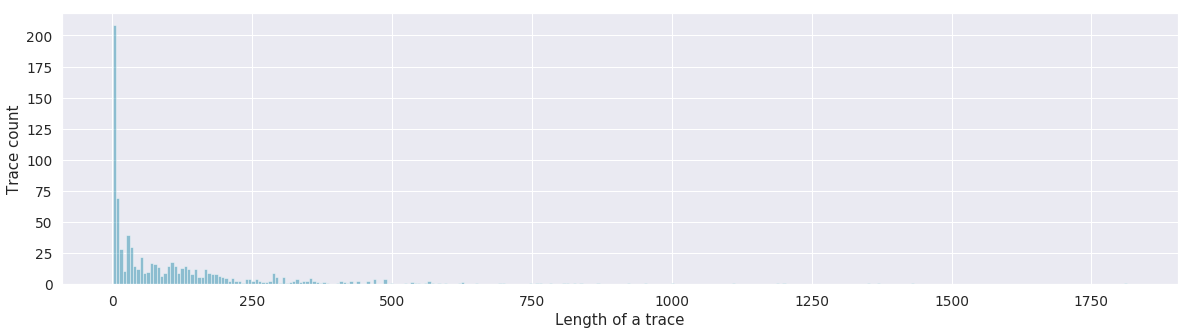

In [173]:
plotax = sns.distplot(trace_lengths2011, bins=300, norm_hist=False, kde=False, color=hpi_blue)
plotax.set(xlabel=trace_length_xlabel, ylabel=trace_length_ylabel)
#plotax.set_yticklabels(['{:,.2%}'.format(x) for x in np.arange(0,0.045,0.005)])

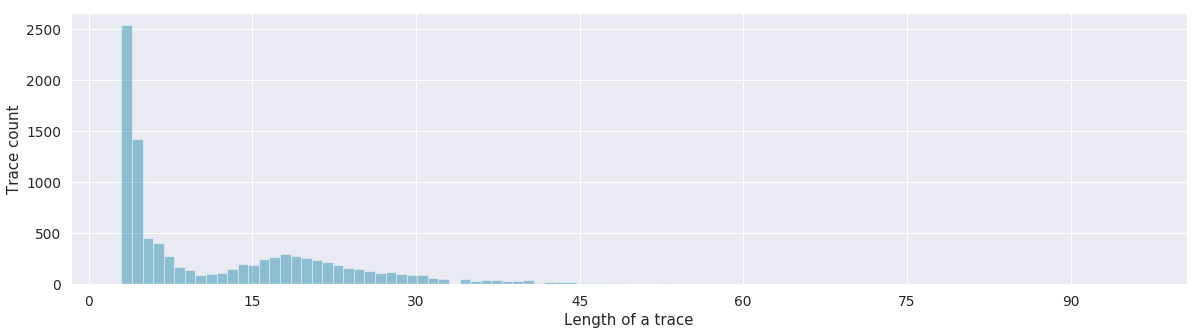

In [171]:
plotax = sns.distplot(trace_lengths2012, bins=96, norm_hist=False, kde=False, color=hpi_blue)
plotax.set(xlabel=trace_length_xlabel, ylabel=trace_length_ylabel)
plotax.xaxis.set_major_locator(MaxNLocator(integer=True))

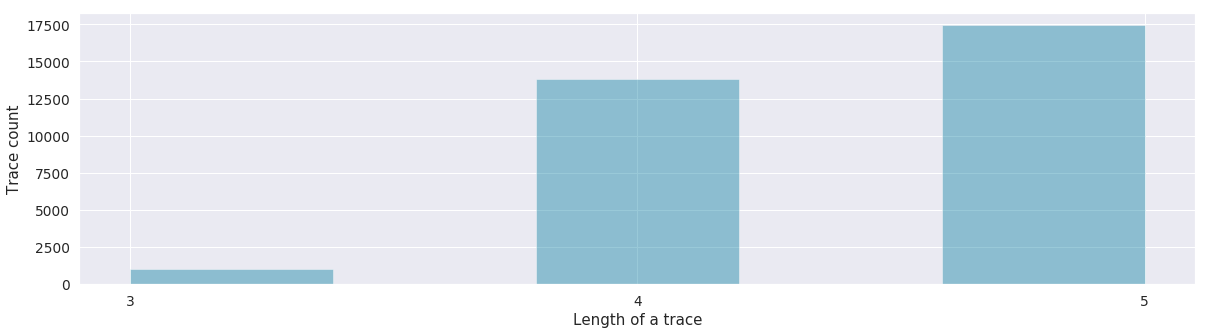

In [170]:
plotax = sns.distplot(trace_lengths2017, bins=5, norm_hist=False, kde=False, color=hpi_blue)
plotax.set(xlabel=trace_length_xlabel, ylabel=trace_length_ylabel)
plotax.xaxis.set_major_locator(MaxNLocator(integer=True))

# Timing measurements

In [144]:
model_fns = ['evermann', 'schoenig', 'sp2', 'pfs']
mode_fns  = ['individual', 'grouped', 'padded', 'windowed']
model_names = ['Evermann et al.', 'Schoenig et al.', 'SP2', 'PFS']
mode_names  = ['Individual', 'Grouped', 'Padded', 'Windowed']

def fill_timing_df(dataset_name):
    df = pd.DataFrame(columns=['Format', 'Model', 'Time'])
    
    for mdl, mdl_name in zip(model_fns, model_names):
        for mdo, mdo_name in zip(mode_fns, mode_names):
            timing_df = pd.read_pickle('/home/felix.wolff2/docker_share/{0}/{1}_{2}_stats.pickled'.format(dataset_name, mdl, mdo))
            t = np.mean(timing_df['training_time'])
            df = df.append({'Format': mdo_name, 'Model': mdl_name, 'Time': t}, ignore_index=True)

    return df

bpic2011_times_df = fill_timing_df('bpic2011_non_stratified')
bpic2012_times_df = fill_timing_df('bpic2012')
bpic2017_times_df = fill_timing_df('bpic2017')

[Text(0, 0.5, 'Training time [s]'), Text(0.5, 0, 'Input formatting strategy')]

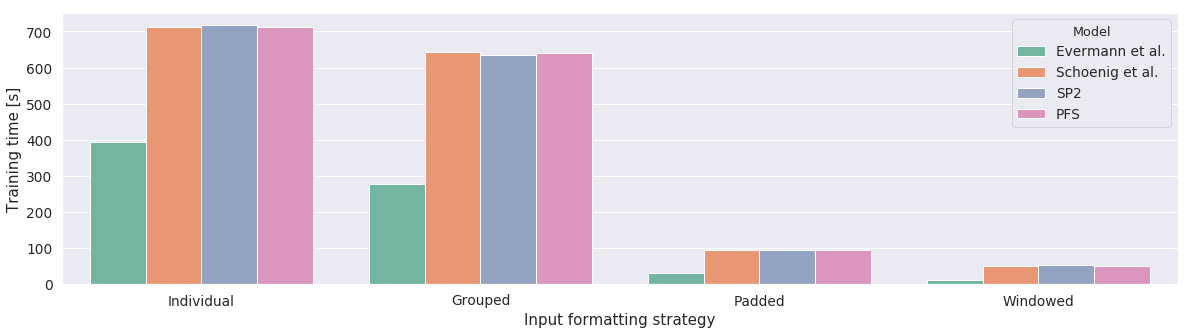

In [145]:
plotax = sns.barplot(data=bpic2011_times_df,
                     x="Format",
                     y="Time",
                     hue="Model",
                     palette=current_palette)
plotax.set(xlabel='Input formatting strategy', ylabel='Training time [s]')

[Text(0, 0.5, 'Training time [s]'), Text(0.5, 0, 'Input formatting strategy')]

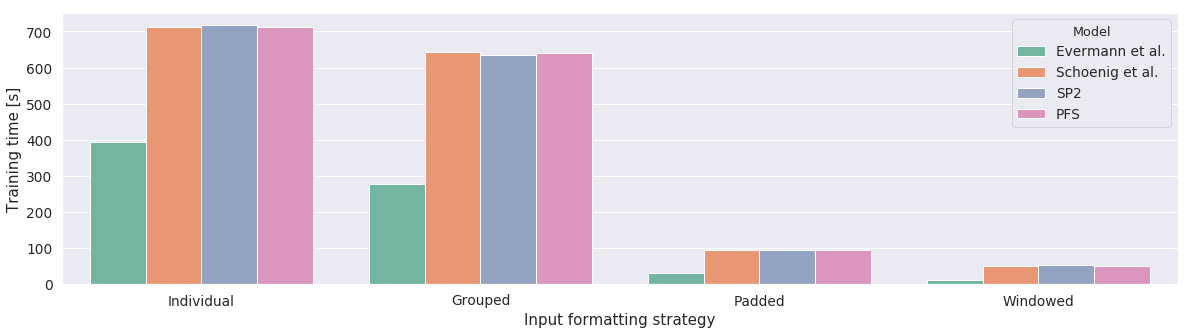

In [145]:
plotax = sns.barplot(data=bpic2012_times_df,
                     x="Format",
                     y="Time",
                     hue="Model",
                     palette=current_palette)
plotax.set(xlabel='Input formatting strategy', ylabel='Training time [s]')

[Text(0, 0.5, 'Training time [s]'), Text(0.5, 0, 'Input formatting strategy')]

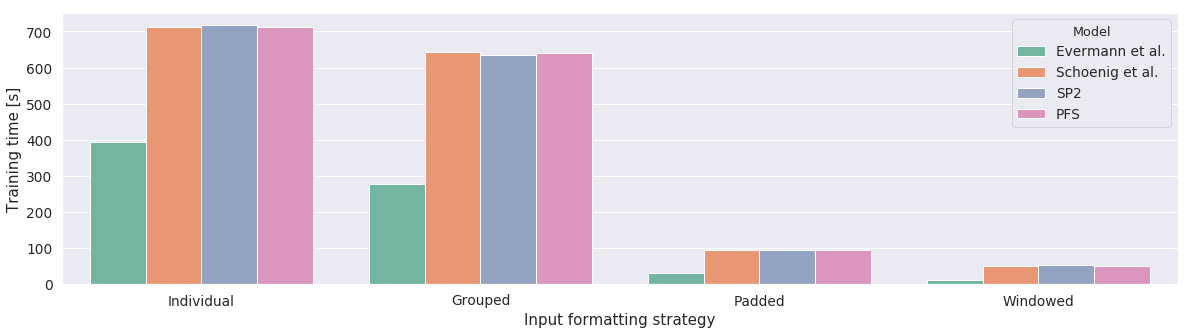

In [145]:
plotax = sns.barplot(data=bpic2017_times_df,
                     x="Format",
                     y="Time",
                     hue="Model",
                     palette=current_palette)
plotax.set(xlabel='Input formatting strategy', ylabel='Training time [s]')